In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
# IMPORTING THE NECESSARY PACKAGES

# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Train-Test Splitting and Hyper-parameter Tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, loguniform, randint

# Performance Metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# Models
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Getting rid of Warnings
import warnings
%matplotlib inline
warnings.filterwarnings('ignore', category=FutureWarning)

# Dummy Classifier Model

In [3]:
# df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

In [4]:
# # Seperating the feature and target columns
# X = df.drop('target', axis=1)
# y = df['target']

# # Initializing the dummy classifier and fitting it
# from sklearn.dummy import DummyClassifier
# model = DummyClassifier().fit(X,y)

# X_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
# y_pred = model.predict(X_test)

# # Submission file generation
# submission = pd.DataFrame({'id': range(0, X_test.shape[0]),
#                           'target': y_pred})

# submission.to_csv('submission.csv', index=False)

# Data Reading and basic information about the Training data

In [5]:
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')    # Reading the training data

In [6]:
df.shape    # Shape of the data

(100000, 76)

In [7]:
df.sample(5)    # A look at the data

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
83831,b51121276e109670a55cf2102335a014,win8defender,1.1.15100.1,4.9.10586.962,1.273.1784.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,0,0.0,0.0,1.0,2018-08-21 14:21:00,2017-06-13,1
68636,30e16f1dcf8531aee58158acdd2da9a5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1520.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,11.0,2018-08-16 21:44:00,2018-08-14,1
65116,48493bd0c1434c6555d24c148baed0ca,win8defender,1.1.15100.1,4.18.1807.18075,1.273.638.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,15.0,2018-08-01 04:31:00,2018-07-10,1
75834,50fb5429bd66fde5d88b1bc0c5823632,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1376.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,11.0,2018-08-14 11:19:00,2018-07-16,1
92661,da44d09486996869c886fa5c0032d2bf,win8defender,1.1.15200.1,4.18.1807.18075,1.275.46.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,0.0,15.0,2018-08-23 15:52:00,2018-07-10,0


In [8]:
df.info()    # Datatypes of various features in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [9]:
df.duplicated().sum()    # Checking for the duplicates in the data

165

We will remove the duplicates form the training set.

In [10]:
df.drop_duplicates(inplace=True)
df.shape    # Shape of the dataset after removing the duplicates

(99835, 76)

In [11]:
df.isnull().sum().sort_values(ascending=False)    # Missing values in the various features of this data

SMode                             981
CityID                            623
RegionIdentifier                  559
IsGamer                           559
InternalBatteryNumberOfCharges    515
                                 ... 
DeviceFamily                        0
ProductName                         0
HasOpticalDiskDrive                 0
PowerPlatformRole                   0
target                              0
Length: 76, dtype: int64

In [12]:
df.isnull().sum().sum()    # Total number of missing values in the dataset

6533

In [13]:
df.describe().T   # How does the data looks mathematically (only for the numerical features)

,count,mean,std,min,25%,50%,75%,max
IsBetaUser,99835.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
RealTimeProtectionState,99769.0,6.848320e+00,1.015524e+00,0.0,7.0,7.0,7.000000e+00,8.000000e+00
IsPassiveModeEnabled,99835.0,1.763910e-02,1.316364e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
AntivirusConfigID,99759.0,4.797648e+04,1.380242e+04,39.0,49480.0,53447.0,5.344700e+04,7.049000e+04
NumAntivirusProductsInstalled,99759.0,1.326457e+00,5.206234e-01,1.0,1.0,1.0,2.000000e+00,5.000000e+00
NumAntivirusProductsEnabled,99759.0,1.018224e+00,1.551352e-01,0.0,1.0,1.0,1.000000e+00,4.000000e+00
HasTpm,99835.0,9.967747e-01,5.670054e-02,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryID,99835.0,1.080612e+02,6.306335e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
CityID,99212.0,8.102525e+04,4.894299e+04,7.0,36679.5,82373.0,1.228010e+05,1.679570e+05
GeoRegionID,99835.0,1.697167e+02,8.919467e+01,1.0,89.0,181.0,2.670000e+02,2.960000e+02


In [14]:
# Seperating the numerical and categorical features

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [15]:
len(numeric_features), len(categorical_features)   # Number of Numeric features and Categorical features

(48, 28)

# Exploratory Data Analysis

## Correlation Heatmap and Distribution Plots

In [16]:
corr = df[numeric_features].corr()
corr.replace(1, -1).max().max()    # Gives the highest positive correlation value in the training set

0.98808238200902

In [17]:
# Heatmap for the numeric features
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, cbar=True, annot=True, fmt='.2f', mask=mask)
plt.title('Heatmap for the Numerical features')
plt.show()

High correlation can be observed in the following pairs:-

- OSBuildNumber and OSBuildNumberOnly
- IsPassiveModeEnabled and RealTimeProtectionState
- ProcessorModelID and ProcessorManufacturerID
- PrimaryDisplayResolutionVertical and PrimaryDisplayResolutionHorizontal
- OSUILocaleID and OSInstallLanguageID


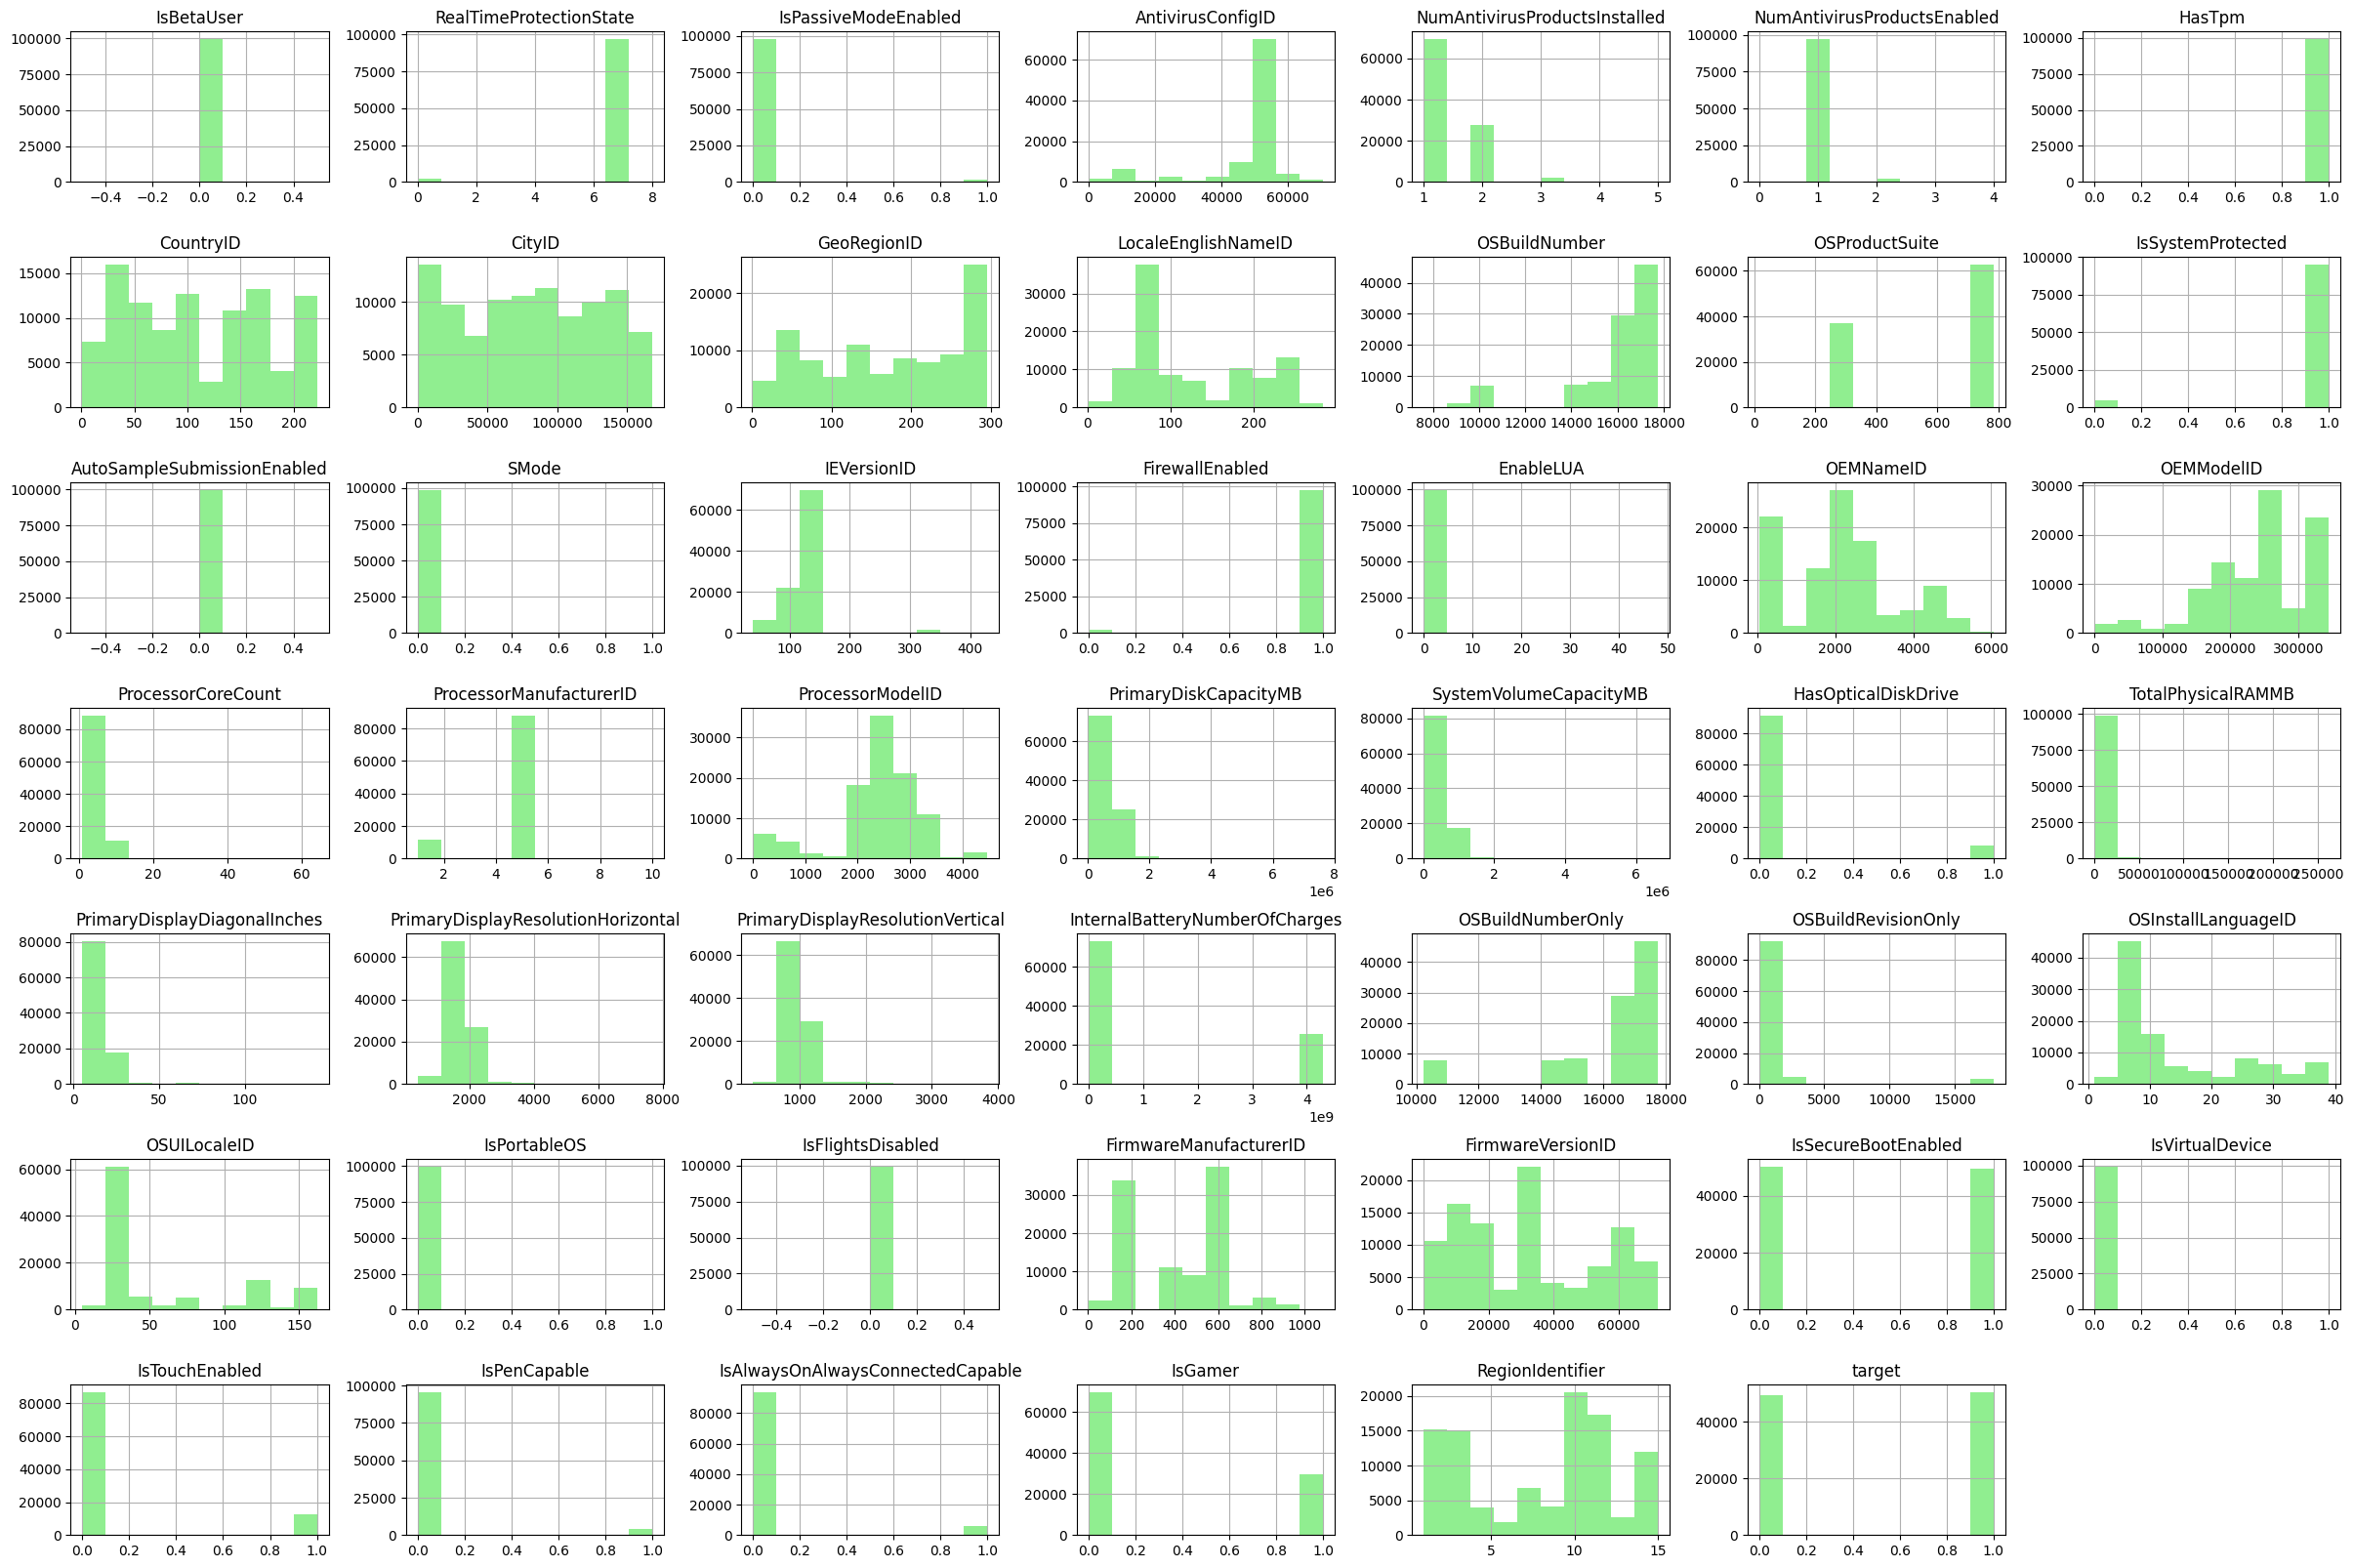

In [18]:
# Histogram plots to show the distribution for various numerical features
df.hist(bins=10, color='lightgreen', figsize=(30,20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [19]:
# Value Counts for all the features in the dataset
for i in df.columns:
  print(df[i].value_counts())

MachineID
f541bae429089117c4aac39c90dd3416    1
380ad51d208f373386dd36c9379f4c13    1
62d7c0d6e18a5a810cd2e4705daec038    1
38cee7a05eacf4fd0f8355e29206f1aa    1
44decb05df630344182b6caf8d610717    1
                                   ..
4d7201d9508f65c8633f425125859225    1
fe0a92ba43834b2dd139425c79b32ab1    1
5488549c7f99ada8bdb2b947a0ae7f81    1
3c22e3d6486525353c3d1fd0299a7e0e    1
ad9c385b53f2ca788933a39603b84eda    1
Name: count, Length: 99835, dtype: int64
ProductName
win8defender    99606
mse               229
Name: count, dtype: int64
EngineVersion
1.1.15200.1    45147
1.1.15100.1    43946
1.1.15000.2     3163
1.1.14901.4     2594
1.1.14800.3     1711
1.1.15300.6      650
1.1.14700.5      593
1.1.14600.4      569
1.1.14104.0      328
1.1.15300.5      252
1.1.13504.0      212
1.1.14500.5      123
1.1.14405.2       82
1.1.14306.0       56
1.1.14202.0       50
1.1.14003.0       34
1.1.13804.0       33
1.1.13903.0       28
1.1.13303.0       27
1.1.13601.0       26
1.1.13407.0    

The 3 features; *IsFlightDisabled, AutoSamplesubmissionEnabled, and IsBetaUser* have only one value, that means they are redundant, and thus can be dropped from the training set as they have no correlation with the other variables.

The features *MachineID and OSSkuFriendlyName* will also be dropped from the training set because they have unique values in each entry.

## target

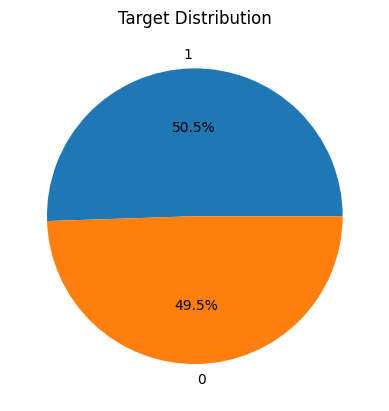

In [20]:
target_dist = df['target'].value_counts()
plt.pie(target_dist, labels=target_dist.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

The training set is **balanced**.

The inference is that **50.5%** of systems have their security compromised.

While the remaining **49.5%** are safe.

## DateOS and DateAS

The features **DateOS** and **DateAS** are the special features as they are in the date-time format.
Let's break down these into time, year, month, and days and look for some insights.

In [21]:
df['DateAS'].isna().sum(), df['DateOS'].isna().sum()    # Number of missing values in DateAS and DateOS

(0, 24)

In [22]:
# Dataframe for the DateOS column
DateOS_df = df['DateOS']

# Converting using the date-time feature of pandas
DateOS_df = pd.to_datetime(DateOS_df)

# Pandas df for year, month and day of DateOS
yearOS = DateOS_df.dt.year
monthOS = DateOS_df.dt.month
dayOS = DateOS_df.dt.day

In [23]:
# Dataframe for the DateAS column
DateAS_df = df['DateAS']

# Converting using the date-time feature of pandas
DateAS_df = pd.to_datetime(DateAS_df)

# Pandas series for year, month, day and time
yearAS = DateAS_df.dt.year
monthAS = DateAS_df.dt.month
dayAS = DateAS_df.dt.day
timeAS = DateAS_df.dt.time

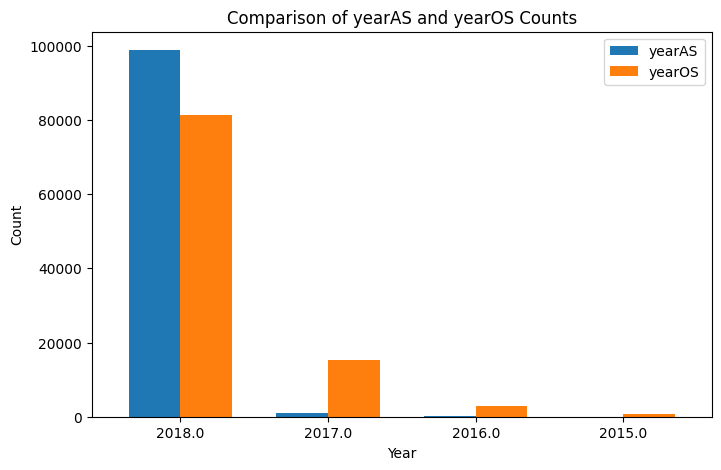

In [24]:
# Count occurrences of each year
yearAS_counts = yearAS.value_counts()
yearOS_counts = yearOS.value_counts()

# Merge the two series into a DataFrame, filling missing values with 0
year_df = pd.concat([yearAS_counts, yearOS_counts], axis=1).fillna(0)

# Plot the bar chart
year_df.plot(kind="bar", figsize=(8, 5), width=0.7)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Comparison of yearAS and yearOS Counts")
plt.legend(["yearAS", "yearOS"])
plt.xticks(rotation=0)
plt.show()

- DateAS spans across 4 years while DateOS for 3 years only.
- For each year, the difference in counts is significant.
- **2018** is a year with much high engagement.

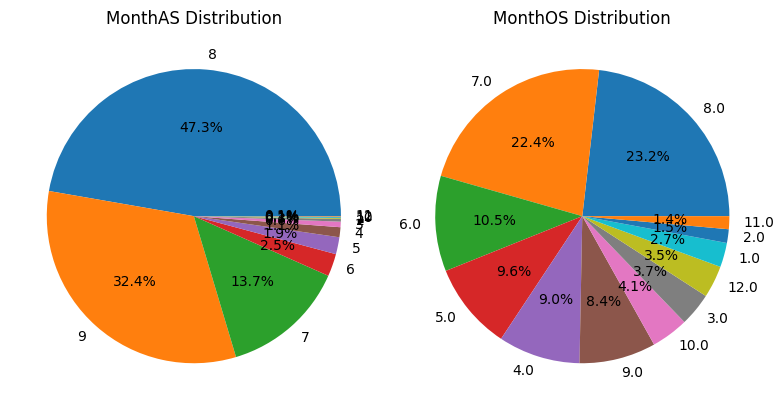

In [25]:
# Count occurrences of each month
monthAS_counts = monthAS.value_counts()
monthOS_counts = monthOS.value_counts()

# Create subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Pie chart for monthAS
axes[0].pie(monthAS_counts, labels=monthAS_counts.index, autopct='%1.1f%%')
axes[0].set_title("MonthAS Distribution")

# Pie chart for monthOS
axes[1].pie(monthOS_counts, labels=monthOS_counts.index, autopct='%1.1f%%')
axes[1].set_title("MonthOS Distribution")

# Display the pie charts
plt.tight_layout()
plt.show()

- Months of *July, August and September* comprise upto **93.4%** of the MonthAS distribution.
- Months of *April, May, June, July and August* comprise around **74.7%** of the MonthOS values.
- The month of **August** looks to be one with a significant importtance.

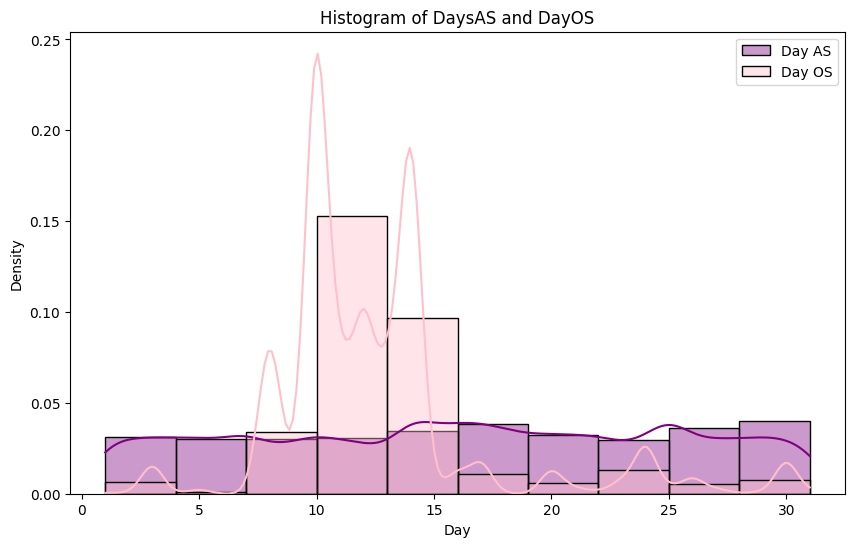

In [26]:
# Plot histogram with KDE
plt.figure(figsize=(10, 6))

sns.histplot(dayAS, bins=10, kde=True, color='purple', label="Day AS", stat="density", alpha=0.4)
sns.histplot(dayOS, bins=10, kde=True, color='pink', label="Day OS", stat="density", alpha=0.4)

# Customize plot
plt.xlabel("Day")
plt.ylabel("Density")
plt.title("Histogram of DaysAS and DayOS")
plt.legend()

# Show plot
plt.show()

- dayAS has a very **uniform distribution** across all dates of a month.
- dayOS shows a very high concentration in the **2nd week of the month**.

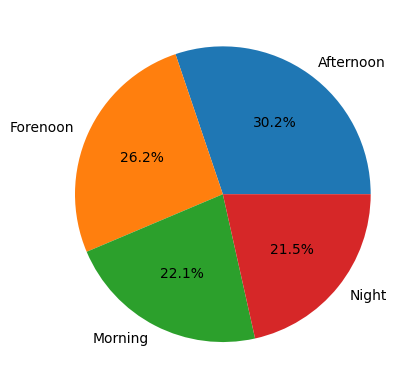

In [27]:
# Function to define various time groups
def time_groups(time):
    if time.hour >= 0 and time.hour < 6:
        return 'Morning'
    elif time.hour >= 6 and time.hour < 12:
        return 'Forenoon'
    elif time.hour >= 12 and time.hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Applying the function on timeAS feature
timeAS_new = timeAS.apply(time_groups)
plt.pie(timeAS_new.value_counts(), labels=timeAS_new.value_counts().index, autopct='%1.1f%%');

Changes based on the inferences from DateAS and DateOS:
- Proportional distribution for all time groups is observed, hence we won't be considering it for the model.
- Both **DateAS and DateOS** columns will be dropped from the dataset.
- **monthAS and monthOS** will be frequency encoded.
- **yearAS and yearOS** will be OneHot encoded.
- Dates, by default, are Ordinally encoded.
- Missing values in *dayOS, monthOS, yearOS* will be imputed using the **most frequent** technique.

## NumAntivirusProductsInstalled and Num AntivirusProductsEnabled

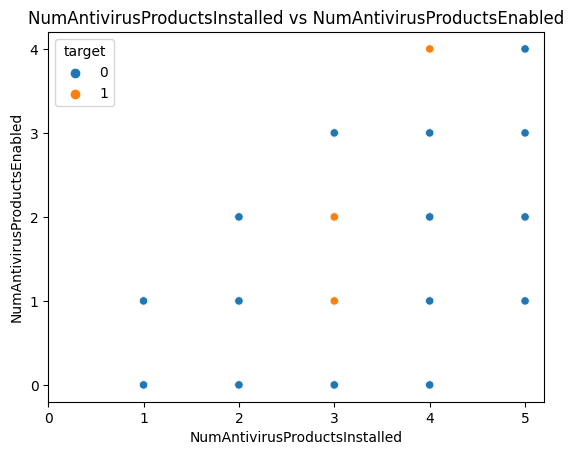

In [28]:
# Plotting a scatterplot to show the relation of Antivirus installed vs Antivirus enabled
sns.scatterplot(x=df['NumAntivirusProductsInstalled'], y=df['NumAntivirusProductsEnabled'], hue=df['target']);
plt.yticks([0,1,2,3,4]);
plt.xticks([0,1,2,3,4,5]);
plt.title('NumAntivirusProductsInstalled vs NumAntivirusProductsEnabled');

- People who have **5 antivirus installed** made sure that they **enabled atleast one** of it, and thus *no system is under security threat*.
- A unique case where **4 antiviruses are installed and enabled** and yet the *system security is compromised* is observed.
- In general we can say that if an antivirus is installed in the system, there are high chances that the system will be safe from threats.

## SKUEditionName and target

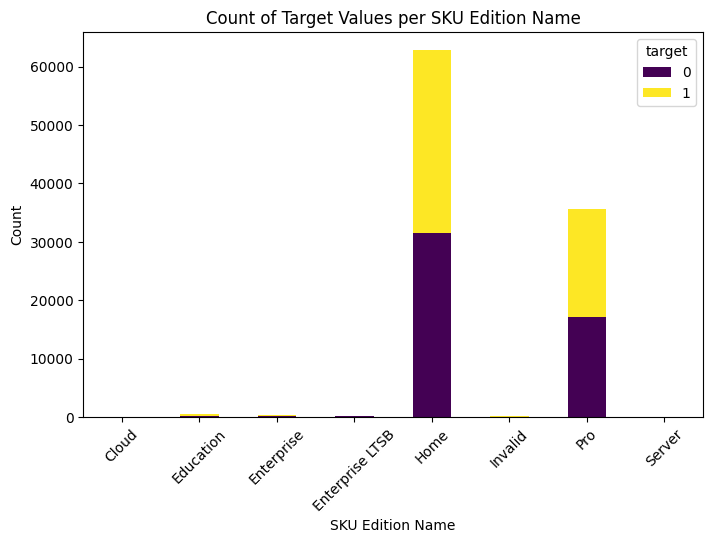

In [29]:
# Count of occurrences of target values per SKU
sku_target_counts = df.groupby(['SKUEditionName', 'target']).size().unstack()

# Plotting stacked bar chart
sku_target_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')

# Label and Title
plt.xlabel('SKU Edition Name')
plt.ylabel('Count')
plt.title('Count of Target Values per SKU Edition Name')
plt.xticks(rotation=45);

- It is observed that the dataset is **majorly** for the systems installed in **homes**.
- An equal distribution is observed for the systems that have security threat and those are safe.

## PlatformType and Processor

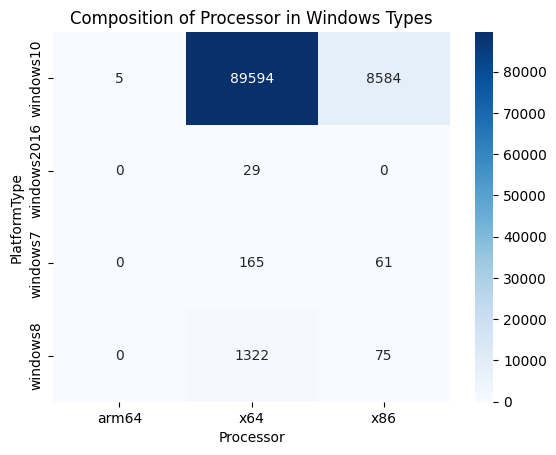

In [30]:
# Heatmap showing the composition of Processor in various Windows types
sns.heatmap(pd.crosstab(df['PlatformType'], df['Processor']), cmap='Blues', annot=True, fmt='d');
plt.title('Composition of Processor in Windows Types');

- More than 95% of the systems in our dataset have Windows10.
- Nearly 90% of the systems have Windows10 and x64 processor.
- arm5 Processor is rare in this dataset.

## PrimaryDiskCapacity

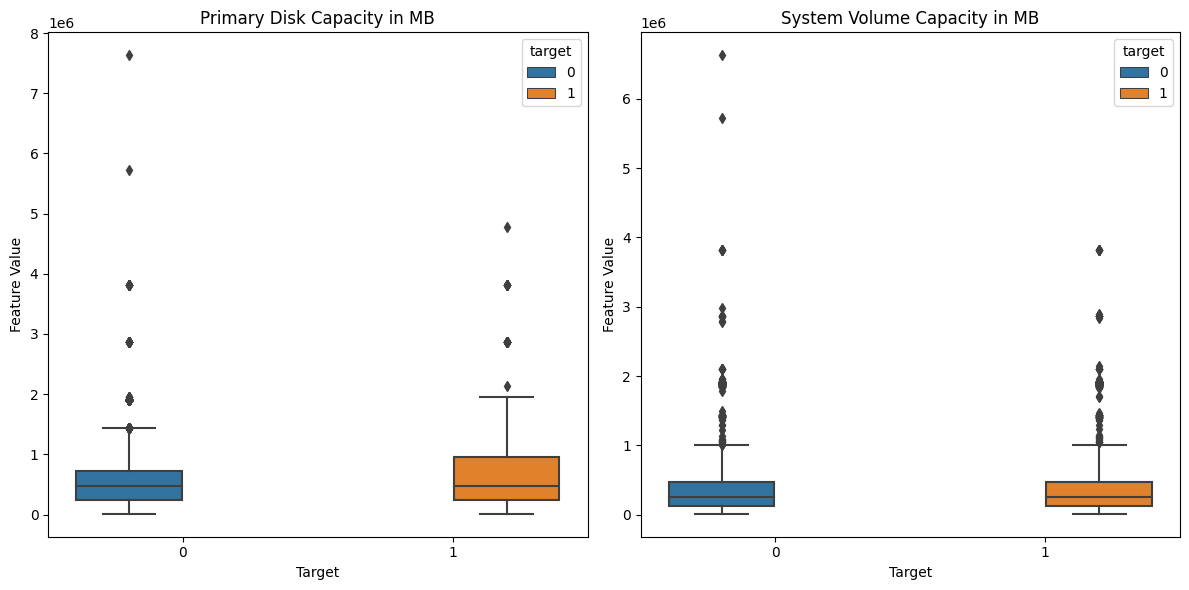

In [31]:
# Plotting Boxplots for Primary Disk Capacity and System Volume Capacity with respect to the Target variable
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=df['target'], y=df['PrimaryDiskCapacityMB'], data=df, ax=axes[0], hue=df['target']);
axes[0].set_title("Primary Disk Capacity in MB");

sns.boxplot(x=df['target'], y=df['SystemVolumeCapacityMB'], data=df, ax=axes[1], hue=df['target']);
axes[1].set_title("System Volume Capacity in MB");

for ax in axes:
    ax.set_xlabel("Target")
    ax.set_ylabel("Feature Value")

plt.tight_layout();
plt.show();

In [32]:
# Statistical Values for Primary Disk Capacity
PrimaryDiskCapacity_stats = df.groupby('target')['PrimaryDiskCapacityMB'].agg(
    Median='median', Mean='mean',
    Q1 = lambda x: x.quantile(0.25),
    Q3 = lambda x: x.quantile(0.75),
)

PrimaryDiskCapacity_stats['IQR'] = PrimaryDiskCapacity_stats['Q3'] - PrimaryDiskCapacity_stats['Q1']
PrimaryDiskCapacity_stats[['Median','Mean','IQR']]

,Median,Mean,IQR
target,,,
0,476940.0,498353.719248,476929.0
1,476940.0,532964.699420,709671.0




1.   **Mean Primary Disk Capacity**:
  - The mean Primary disk capacity for the systems which are not in threat is **498353.71** MB.
  - The mean Primary disk capacity for the systems which are under threat is **532964.69** MB.
2.   **Median Primary Disk Capacity**:
  - The median Primary disk capacity for the systems which are not in threat is **476940.0** MB.
  - The median Primary disk capacity for the systems which are under threat is **476940.0** MB.
  - Same median Primary disk capacity for both the both the cases.

In [33]:
# Statistical Values for System Volume Capacity
PrimaryDiskCapacity_stats = df.groupby('target')['SystemVolumeCapacityMB'].agg(
    Median='median', Mean='mean',
    Q1 = lambda x: x.quantile(0.25),
    Q3 = lambda x: x.quantile(0.75),
)

PrimaryDiskCapacity_stats['IQR'] = PrimaryDiskCapacity_stats['Q3'] - PrimaryDiskCapacity_stats['Q1']
PrimaryDiskCapacity_stats[['Median','Mean','IQR']]

,Median,Mean,IQR
target,,,
0,259786.0,377429.793612,356036.0
1,255845.0,386425.684238,354896.0




1.   **Mean System Volume Capacity**:
  - The mean System Volume capacity for the systems which are not in threat is **377429.79** MB.
  - The mean System Volume capacity for the systems which are under threat is **386425.68** MB.
2.   **Median System Volume Capacity**:
  - The median System Volume capacity for the systems which are not in threat is **259786.0** MB.
  - The median System Volume capacity for the systems which are under threat is **255845.0** MB.


# Feature Engineering

## Engine Version

In [34]:
df['EngineVersion'].value_counts().head()

EngineVersion
1.1.15200.1    45147
1.1.15100.1    43946
1.1.15000.2     3163
1.1.14901.4     2594
1.1.14800.3     1711
Name: count, dtype: int64

Since the feature has enough unique values with considerable difference in cardinality, EngineVersion can be divided into groups based on count. The groups thus formed can be encoded further.

In [35]:
# Function for creating divisions based on engine version count.
EngineVersion_count = df['EngineVersion'].value_counts()

def VersionNo(id_):
  count = EngineVersion_count.get(id_, 0)
  if count > 10_000:
      return 'Version_1'
  elif 1000 < count <= 10000:
      return 'Version_2'
  else:
      return 'Version_3'

## AppVersion

In [36]:
df['AppVersion'].value_counts().head(10)

AppVersion
4.18.1807.18075     62018
4.18.1806.18062     10458
4.12.16299.15        3229
4.16.17656.18052     2940
4.14.17639.18041     2481
4.8.10240.17443      2417
4.9.10586.1106       2272
4.13.17134.1         2136
4.13.17134.228       2118
4.10.209.0           1586
Name: count, dtype: int64

App versions with relatively lesser counts can be clubbed together as **Others**.

In [37]:
AppVersion_counts = df['AppVersion'].value_counts()

# Renaming values with counts less than 5000 to "Others"
df['AppVersion'] = df['AppVersion'].apply(lambda x: 'Others' if AppVersion_counts[x] < 5000 else x)

In [38]:
df['AppVersion'].value_counts()

AppVersion
4.18.1807.18075    62018
Others             27359
4.18.1806.18062    10458
Name: count, dtype: int64

## SignatureVersion

In [39]:
df['SignatureVersion'].value_counts().head()

SignatureVersion
1.273.1420.0    1273
1.275.1140.0    1142
1.273.371.0     1068
1.275.727.0     1041
1.273.1826.0     996
Name: count, dtype: int64

In [40]:
df['SignatureVersion'].unique().shape

(2735,)

Since there is a significant number of unique values in this feature and there isn't much difference in the cardinality of various values, **frequency encoding** is the approach we can use in this case.

## OSVersion

In [41]:
df['OSVersion'].value_counts()

OSVersion
10.0.0.0    98207
6.3.0.0      1397
6.1.1.0       226
10.0.1.0        2
10.0.2.0        1
10.0.3.0        1
10.0.4.0        1
Name: count, dtype: int64

In [42]:
OSVersion_counts = df['OSVersion'].value_counts()

# Renaming values with counts less than 10 to "Others"
df['OSVersion'] = df['OSVersion'].apply(lambda x: 'Others' if OSVersion_counts[x] < 10 else x)

## OSPlatformSubRelease

In [43]:
df['OsPlatformSubRelease'].value_counts()

OsPlatformSubRelease
rs4           45764
rs3           29579
rs2            8365
rs1            7366
th2            3865
th1            3100
windows8.1     1397
windows7        226
prers5          173
Name: count, dtype: int64

Clubbing various values in this feature into groups based on their root OS Platform.

In [44]:
def OSPlatformGroups(x):
  if x in ['windows8.1','windows7']:
    return 'Windows'
  elif x in ['rs4','rs3','rs2','rs1']:
    return 'RS'
  elif x in ['th1','th2']:
    return 'TH'
  else:
    return 'prers5'

## OSBuildLab

In [45]:
df['OSBuildLab'].value_counts().head(10)

OSBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 42895
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    15129
16299.15.amd64fre.rs3_release.170928-1534                11089
15063.0.amd64fre.rs2_release.170317-1834                  7747
17134.1.x86fre.rs4_release.180410-1804                    2865
16299.15.x86fre.rs3_release.170928-1534                   2761
14393.2189.amd64fre.rs1_release.180329-1711               2201
10240.17443.amd64fre.th1.170602-2340                      2006
10586.1176.amd64fre.th2_release_sec.170913-1848           1658
15063.0.x86fre.rs2_release.170317-1834                     618
Name: count, dtype: int64

In [46]:
OSBuildLab_count = df['OSBuildLab'].value_counts()

def LabNo(id_):
  count = OSBuildLab_count.get(id_, 0)
  if count > 10_000:
      return 'Set_1'
  elif 1000 < count <= 10_000:
      return 'Set_2'
  else:
      return 'Set_3'

## PrimaryDiskType

In [47]:
df['PrimaryDiskType'].value_counts()

PrimaryDiskType
HDD            66083
SSD            27862
UNKNOWN         3099
Unspecified     2768
Name: count, dtype: int64

In [48]:
# Merging UNKNOWN and Unspecified together
df['PrimaryDiskType'] = df['PrimaryDiskType'].replace('Unspecified', 'UNKNOWN')
df['PrimaryDiskType'].value_counts()

PrimaryDiskType
HDD        66083
SSD        27862
UNKNOWN     5867
Name: count, dtype: int64

Missing values in this field will be imputed using the **most-frequent** technique.

## ChasisType

In [49]:
df['ChassisType'].value_counts()

ChassisType
Notebook               59363
Desktop                20787
Laptop                  7804
Portable                4113
AllinOne                2262
Convertible              965
MiniTower                951
Detachable               611
LowProfileDesktop        557
Other                    535
HandHeld                 523
UNKNOWN                  453
SpaceSaving              324
Tablet                   161
Tower                    128
MainServerChassis        111
Unknown                   59
LunchBox                  39
MiniPC                    34
RackMountChassis          17
BusExpansionChassis       13
SubNotebook               11
0                          4
30                         4
CompactPCI                 1
SubChassis                 1
MultisystemChassis         1
35                         1
Name: count, dtype: int64

Since this field already has some missing values and even the **Unknown, UNKNOWN, 0, 30, 35** can be considered as missing values, we will have to impute them using the most frequent technique of imputation.

In [50]:
# 0, 30 and 35 have to be included as Unknown
df['ChassisType'] = df['ChassisType'].replace([0, 30, 35], np.nan)
df['ChassisType'] = df['ChassisType'].replace('UNKNOWN', np.nan)
df['ChassisType'] = df['ChassisType'].replace('Unknown', np.nan)

df['ChassisType'].isnull().sum()

514

## OSBranch

In [51]:
df['OSBranch'].value_counts()

OSBranch
rs4_release                  46838
rs3_release_svc_escrow       14490
rs3_release                  14316
rs2_release                   8514
rs1_release                   7766
th2_release_sec               2909
th1_st1                       2294
th2_release                   1631
th1                            823
rs5_release                    145
rs3_release_svc_escrow_im       78
rs_prerelease_flt               26
rs_prerelease                    5
Name: count, dtype: int64

In [52]:
def OSBranchGroups(x):
  if x in ['rs4_release','rs3_release_svc_escrow','rs3_release','rs2_release','rs1_release','rs5_release','rs3_release_svc_escrow_im','rs_prerelease_flt','rs_prerelease']:
    return 'RS'
  elif x in ['th2_release_sec','th1_st1','th2_release','th1']:
    return 'TH'

## OSEdition

In [53]:
df['OSEdition'].value_counts()

OSEdition
Core                       39210
Professional               34545
CoreSingleLanguage         21968
CoreCountrySpecific         1820
ProfessionalEducation        703
Education                    495
Enterprise                   390
ProfessionalN                289
EnterpriseS                  238
Cloud                         67
CoreN                         49
ServerStandard                21
EnterpriseSN                  13
EducationN                    11
ServerStandardEval             5
ProfessionalEducationN         3
EnterpriseN                    3
ServerSolution                 2
ProfessionalWorkstation        2
ServerDatacenterEval           1
Name: count, dtype: int64

In [54]:
# Function for creating divisions based on OS Edition count.
OSEdition_count = df['OSEdition'].value_counts()

def EditionNo(id_):
  count = OSEdition_count.get(id_, 0)
  if count > 10_000:
      return 'Edition_1'
  elif 400 < count <= 10_000:
      return 'Edition_2'
  else:
      return 'Edition_3'

All these changes will be implemented on these features in the dataset.

The various functions created here will be applied and these original columns will be dropped.

Further imputations, encodings and scaling will be performed on the dataset.

# Data Preprocessing

In [55]:
# Applying all the grouping functions
df['EngVerNo'] = df['EngineVersion'].apply(VersionNo)    # Engine Version Groups
df['OSPltGrp'] = df['OsPlatformSubRelease'].apply(OSPlatformGroups)    # OS Platform Groups
df['OSLabNo']= df['OSBuildLab'].apply(LabNo)    # OS Build Lab Groups
df['OSBranchGrp'] = df['OSBranch'].apply(OSBranchGroups)    # OS Branch Groups
df['OSEdiNo'] = df['OSEdition'].apply(EditionNo)    # OS Edition Groups

# # Adding yearOS, yearAS, monthOS, monthAS, dayOS, dayAS in the dataset
df['yearOS'] = yearOS
df['yearAS'] = yearAS
df['monthOS'] = monthOS
df['monthAS'] = monthAS
df['dayOS'] = dayOS
df['dayAS'] = dayAS

# Dropping the redundant columns
new_df = df.drop(['IsFlightsDisabled','AutoSampleSubmissionEnabled',
                  'OSSkuFriendlyName','IsBetaUser','MachineID','DateAS','DateOS',
                  'EngineVersion','OsPlatformSubRelease','OSBuildLab','OSEdition','OSBranch'], axis=1)

# Performing FREQUENCY ENCODING
freq_enc_features = ['SignatureVersion','ChassisType','NumericOSVersion','monthOS','monthAS']

for i in freq_enc_features:
  new_df[i] = new_df[i].map(new_df[i].value_counts(normalize=True))

new_df

,ProductName,AppVersion,SignatureVersion,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,...,OSPltGrp,OSLabNo,OSBranchGrp,OSEdiNo,yearOS,yearAS,monthOS,monthAS,dayOS,dayAS
0,win8defender,4.18.1807.18075,0.000250,7.0,0,53447.0,1.0,1.0,1,51,...,RS,Set_3,RS,Edition_1,2018.0,2018,0.090090,0.323674,17.0,10
1,win8defender,4.18.1807.18075,0.001052,7.0,0,53447.0,1.0,1.0,1,141,...,RS,Set_1,RS,Edition_1,2018.0,2018,0.231758,0.472640,14.0,16
2,win8defender,4.18.1807.18075,0.001332,7.0,0,53447.0,1.0,1.0,1,51,...,RS,Set_1,RS,Edition_1,2018.0,2018,0.084169,0.323674,11.0,20
3,win8defender,Others,0.001262,7.0,0,46413.0,2.0,1.0,1,68,...,RS,Set_2,RS,Edition_1,2018.0,2018,0.026791,0.323674,3.0,14
4,win8defender,Others,0.001342,7.0,0,40466.0,2.0,1.0,1,43,...,RS,Set_2,RS,Edition_1,2018.0,2018,0.084169,0.323674,11.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,win8defender,4.18.1807.18075,0.000621,7.0,0,68585.0,2.0,1.0,1,43,...,RS,Set_1,RS,Edition_1,2018.0,2018,0.084169,0.323674,20.0,21
99996,win8defender,4.18.1806.18062,0.000631,7.0,0,11280.0,2.0,1.0,1,137,...,RS,Set_1,RS,Edition_1,2018.0,2018,0.224033,0.472640,10.0,10
99997,win8defender,4.18.1807.18075,0.000531,7.0,0,53447.0,1.0,1.0,1,142,...,RS,Set_1,RS,Edition_1,2018.0,2018,0.036569,0.472640,13.0,26
99998,win8defender,Others,0.000110,7.0,0,53447.0,1.0,1.0,1,139,...,RS,Set_1,RS,Edition_1,2018.0,2018,0.096152,0.024811,8.0,4


## Imputation

In [56]:
# List of numeric features that have missing values
imputation_features = []

for i in new_df.columns:
  if df[i].isnull().sum() > 0:
    imputation_features.append(i)

imputation_features.append('monthAS')
imputation_features.append('dayAS')
imputation_features.append('GeoRegionID')

imputation_features

['RealTimeProtectionState',
 'AntivirusConfigID',
 'NumAntivirusProductsInstalled',
 'NumAntivirusProductsEnabled',
 'CityID',
 'IsSystemProtected',
 'SMode',
 'IEVersionID',
 'FirewallEnabled',
 'EnableLUA',
 'OEMNameID',
 'OEMModelID',
 'ProcessorCoreCount',
 'ProcessorManufacturerID',
 'ProcessorModelID',
 'PrimaryDiskCapacityMB',
 'PrimaryDiskType',
 'SystemVolumeCapacityMB',
 'TotalPhysicalRAMMB',
 'ChassisType',
 'PrimaryDisplayDiagonalInches',
 'PrimaryDisplayResolutionHorizontal',
 'PrimaryDisplayResolutionVertical',
 'InternalBatteryNumberOfCharges',
 'OSInstallLanguageID',
 'FirmwareManufacturerID',
 'FirmwareVersionID',
 'IsVirtualDevice',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsGamer',
 'RegionIdentifier',
 'yearOS',
 'monthOS',
 'dayOS',
 'monthAS',
 'dayAS',
 'GeoRegionID']

All these features will be imputed using the **Most-frequent** technique.

## Encoding

In [57]:
# Features on which One Hot Encoding will be performed.
ohe_features = [
    "ProductName", "EngVerNo", "PlatformType", "Processor", "OSVersion",
    "OSPltGrp", "OSLabNo", "DeviceFamily", "PrimaryDiskType", "OSArchitecture",
    "OSBranchGrp", "OSEdiNo", "AutoUpdateOptionsName", "OSGenuineState",
    "LicenseActivationChannel", "FlightRing","yearOS", "yearAS"
]

# Features on which Ordinal Encoding will be performed.
oe_features = [
    "AppVersion", "SKUEditionName", "MDC2FormFactor",
    "PowerPlatformRole", "OSInstallType"
]

## Scaling

In [58]:
 # Features on which MinMax Scaling will be performed.
mm_features = [
    "RegionIdentifier", "RealTimeProtectionState", "NumAntivirusProductsInstalled",
    "NumAntivirusProductsEnabled", "CountryID", "GeoRegionID",
    "LocaleEnglishNameID", "ProcessorCoreCount", "ProcessorManufacturerID",
    "PrimaryDisplayDiagonalInches", "PrimaryDisplayResolutionHorizontal",
    "PrimaryDisplayResolutionVertical", "InternalBatteryNumberOfCharges",
    "OSInstallLanguageID","dayOS","dayAS", "FirmwareVersionID", "FirmwareManufacturerID", "AntivirusConfigID", "CityID",
    "OSProductSuite", "IEVersionID", "OEMNameID",
    "OEMModelID", "ProcessorModelID", "PrimaryDiskCapacityMB",
    "SystemVolumeCapacityMB", "TotalPhysicalRAMMB", "OSBuildNumberOnly",
    "OSBuildRevisionOnly", "OSUILocaleID"
]

In [59]:
# FEATURE and TARGET seperation
X = new_df.drop('target', axis=1)    # The data features
y = new_df['target']    # The target variable

# Pipeline

In [60]:
# Imputation pipe
impute_transformer = [('Most Freq Imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan), imputation_features)]
imputation_pipe = ColumnTransformer(transformers=impute_transformer, remainder='passthrough', verbose_feature_names_out=False)

# Encoding pipe
oe_categories = [
    ['4.18.1806.18062','Others','4.18.1807.18075'],
    ['Server','Cloud','Invalid','Enterprise LTSB','Enterprise','Education','Pro','Home'],
    ['LargeServer','MediumServer','SmallServer','SmallTablet','LargeTablet','PCOther','AllInOne','Detachable','Convertible','Desktop','Notebook'],
    ['PerformanceServer','EnterpriseServer','AppliancePC','UNKNOWN','SOHOServer','Workstation','Slate','Desktop','Mobile'],
    ['CleanPCRefresh','Clean','Refresh','Reset','Other','Upgrade','IBSClean','Update','UUPUpgrade']
]

encoder_transformer = [('OneHotEncoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ohe_features),
                       ('OrdinalEncoder', OrdinalEncoder(categories=oe_categories), oe_features)]
encoding_pipe = ColumnTransformer(transformers=encoder_transformer, remainder='passthrough', verbose_feature_names_out=False)

# Scaling pipe
scale_transformer = [('MinMaxScaler', MinMaxScaler(), mm_features)]
scaling_pipe = ColumnTransformer(transformers=scale_transformer, remainder='passthrough', verbose_feature_names_out=False)

# Complete Pipeline
complete_pipe = Pipeline(steps=[('Imputation', imputation_pipe),
                                ('Encoding', encoding_pipe),
                                ('Scaling', scaling_pipe)]).set_output(transform='pandas')

complete_pipe

Pipeline(steps=[('Imputation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Most Freq Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['RealTimeProtectionState',
                                                   'AntivirusConfigID',
                                                   'NumAntivirusProductsInstalled',
                                                   'NumAntivirusProductsEnabled',
                                                   'CityID',
                                                   'IsSystemProtected', 'SMode',
                                                   'IEVersionID',
                                                   'FirewallEnabled',
                                                   'EnableLUA', 'OEMNameID',
                                                   'OE...
                                                   'InternalBatteryNumberOfCharges',
                                                   'OSInstallLanguageID',
                                                   'dayOS', 'dayAS',
                                                   'FirmwareVersionID',
                                                   'FirmwareManufacturerID',
                                                   'AntivirusConfigID',
                                                   'CityID', 'OSProductSuite',
                                                   'IEVersionID', 'OEMNameID',
                                                   'OEMModelID',
                                                   'ProcessorModelID',
                                                   'PrimaryDiskCapacityMB',
                                                   'SystemVolumeCapacityMB',
                                                   'TotalPhysicalRAMMB',
                                                   'OSBuildNumberOnly',
                                                   'OSBuildRevisionOnly', ...])],
                                   verbose_feature_names_out=False))])

# Train-Validation Split

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((69884, 74), (29951, 74), (69884,), (29951,))

In [62]:
# Fitting the pipeline on the X_train and transforming the train set
X_train_transformed = complete_pipe.fit_transform(X_train)
X_train_transformed.head()    # A look at the transformed training set

,RegionIdentifier,RealTimeProtectionState,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,CountryID,GeoRegionID,LocaleEnglishNameID,ProcessorCoreCount,ProcessorManufacturerID,PrimaryDisplayDiagonalInches,...,SignatureVersion,IsPassiveModeEnabled,HasTpm,OSBuildNumber,HasOpticalDiskDrive,NumericOSVersion,IsPortableOS,IsSecureBootEnabled,IsTouchEnabled,IsPenCapable
50902,0.714286,0.875,0.0,0.25,0.660633,0.632653,0.258865,0.047619,0.444444,0.056410,...,0.001092,0,1,16299,0,0.066269,0,1,1,1
6368,0.142857,0.875,0.0,0.25,0.090498,0.081633,0.205674,0.111111,0.444444,0.073260,...,0.000521,0,1,16299,0,0.042250,0,1,0,0
30328,0.142857,0.875,0.0,0.25,0.579186,0.520408,0.262411,0.047619,0.444444,0.073260,...,0.000982,0,1,17134,0,0.170702,0,0,0,0
33818,0.642857,0.875,0.0,0.25,0.633484,0.812925,0.822695,0.015873,0.444444,0.061538,...,0.001252,0,1,16299,0,0.066269,0,0,0,0
34007,0.500000,0.875,0.0,0.25,0.416290,0.938776,0.262411,0.047619,0.444444,0.095238,...,0.000511,0,1,9600,1,0.001793,0,0,0,0


In [63]:
# checking if any categorical features in X_train_transformed
cat_features = X_train_transformed.columns[X_train_transformed.dtypes == 'object']
cat_features

Index(['IsSystemProtected', 'SMode', 'FirewallEnabled', 'EnableLUA',
       'ChassisType', 'IsVirtualDevice', 'IsAlwaysOnAlwaysConnectedCapable',
       'IsGamer', 'monthOS', 'monthAS'],
      dtype='object')

In [64]:
X_train_transformed[cat_features]    # look on the categorical features in X_train_transformed

,IsSystemProtected,SMode,FirewallEnabled,EnableLUA,ChassisType,IsVirtualDevice,IsAlwaysOnAlwaysConnectedCapable,IsGamer,monthOS,monthAS
50902,1.0,0.0,1.0,1.0,0.597688,0.0,0.0,1.0,0.096152,0.47264
6368,1.0,0.0,1.0,1.0,0.597688,0.0,0.0,0.0,0.224033,0.47264
30328,1.0,0.0,1.0,1.0,0.597688,0.0,0.0,0.0,0.231758,0.47264
33818,1.0,0.0,1.0,1.0,0.078574,0.0,0.0,0.0,0.096152,0.47264
34007,1.0,0.0,1.0,1.0,0.209291,0.0,0.0,0.0,0.231758,0.47264
...,...,...,...,...,...,...,...,...,...,...
6266,1.0,0.0,1.0,1.0,0.597688,0.0,0.0,1.0,0.231758,0.323674
54933,1.0,0.0,1.0,1.0,0.597688,0.0,0.0,1.0,0.09009,0.47264
76905,1.0,0.0,1.0,1.0,0.209291,0.0,0.0,1.0,0.231758,0.47264
860,1.0,0.0,1.0,1.0,0.597688,0.0,0.0,0.0,0.09009,0.024811


All of these are float numbers, which are stored in the **object** datatype.

In [65]:
# Changing datatype of categorical features to float in training set
X_train_transformed[cat_features] = X_train_transformed[cat_features].astype('float64')
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69884 entries, 50902 to 15803
Columns: 104 entries, RegionIdentifier to IsPenCapable
dtypes: float64(96), int64(8)
memory usage: 56.0 MB


In [66]:
X_val_transformed = complete_pipe.transform(X_val)    # Transforming the validation set.

In [67]:
# Changing datatype of categorical features to float in validation set
X_val_transformed[cat_features] = X_val_transformed[cat_features].astype('float64')
X_val_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29951 entries, 48869 to 45427
Columns: 104 entries, RegionIdentifier to IsPenCapable
dtypes: float64(96), int64(8)
memory usage: 24.0 MB


# Machine Learning Models

## Model-1: SGD Classifier

In [68]:
# # Initializing the classifier and the SGD Classifier model
# sgd_clf = SGDClassifier(random_state=42)
# model1_sgd = sgd_clf.fit(X_train_transformed, y_train)

# # Making prediction on the validation set using the SGD Classifier model
# y_pred_sgd = model1_sgd.predict(X_val_transformed)

# # Checking the accuracy score between the predicted and validation set values
# accuracy_score(y_val, y_pred_sgd)

The accuracy score for the default SGD Classifier model is **0.5084638242462689**.

In [69]:
# ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_sgd), display_labels=sgd_clf.classes_).plot();

## Model-2: Gaussian Naive Bayes

In [70]:
# # Initializing the GaussianNB classifier
# nb_clf = GaussianNB()
# model1_nb = nb_clf.fit(X_train_transformed, y_train)

# # Making prediction on the validation set using the SGD Classifier model
# y_pred_nb = model1_nb.predict(X_val_transformed)

# # Checking the accuracy score between the predicted and validation set values
# accuracy_score(y_val, y_pred_nb)

The accuracy score on the validation set for the default GaussianNB model is **0.5678608393709725**.

In [71]:
# ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_nb), display_labels=nb_clf.classes_).plot();

## Model-3: Random Forest Classifier

In [72]:
# # Initializing the Random Forest classifier
# rf_clf = RandomForestClassifier(random_state=42)
# model1_rf = rf_clf.fit(X_train_transformed, y_train)

# # Making prediction on the validation set using the SGD Classifier model
# y_pred_rf = model1_rf.predict(X_val_transformed)

# # Checking the accuracy score between the predicted and validation set values
# accuracy_score(y_val, y_pred_rf)

The accuracy score on the validation set for the default Random Forest Classifier model is **0.6077259523889019**.

In [73]:
# ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_rf), display_labels=rf_clf.classes_).plot();

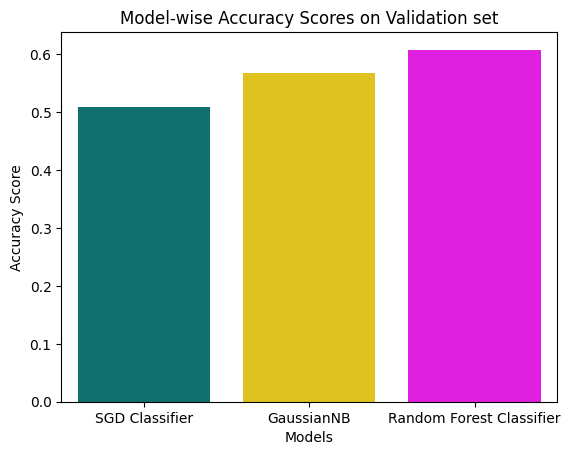

In [74]:
# Comparision Bar Plot
models = ['SGD Classifier', 'GaussianNB', 'Random Forest Classifier']
scores = [0.5084638242462689, 0.5678608393709725, 0.6077259523889019]

sns.barplot(x=models, y=scores, palette=['teal','gold','magenta']);
plt.xlabel('Models');
plt.ylabel('Accuracy Score');
plt.title('Model-wise Accuracy Scores on Validation set');

## Hyper-parameter Tuning

In [75]:
# # Parameter dictionary for SGD Classifier
# param_dist_sgd = {
#     'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'alpha': loguniform(1e-5, 1e-1),
#     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
#     'fit_intercept': [True, False],
#     'max_iter': [2000, 3000, 5000],
#     'eta0': uniform(0.001, 0.1),
#     'l1_ratio': uniform(0, 1)
# }

# # Parameter dictionary for Gaussian Naive Bayes
# param_dist_nb = {
#     'var_smoothing': loguniform(1e-10, 1e-1)
# }

# # Parameter dictionary for Random Forest Classifier
# param_dist_rf = {
#     'n_estimators': randint(50, 500),
#     'max_depth': [None] + list(np.arange(5, 30, 5)),
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 11),
#     'max_features': [None, 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'max_leaf_nodes': randint(2,6),
#     'warm_start': [True, False]
# }

# # Initializing the Randomized Searches for hyper-parameter tuning of the ML models
# random_search_sgd = RandomizedSearchCV(sgd_clf, param_dist_sgd, n_iter=10, cv=5, scoring='accuracy', random_state=42)
# random_search_sgd.fit(X_train_transformed, y_train)

# random_search_nb = RandomizedSearchCV(nb_clf, param_dist_nb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
# random_search_nb.fit(X_train_transformed, y_train)

# random_search_rf = RandomizedSearchCV(rf_clf, param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
# random_search_rf.fit(X_train_transformed, y_train)

The best parameters corresponding to the SGDClassifier as obtained after hyper-parameter tuning are:

- alpha = 2.303699023037864e-05
- eta0 = 0.06283860093330873
- fit_intercept = False
- l1_ratio = 0.5142344384136116
- learning_rate = 'adaptive'
- loss = 'hinge'
- max_iter = 5000
- penalty = 'l1'

In [76]:
# # Accuracy score on validation set for Best SGD Classifier
# best_sgd_clf = SGDClassifier(alpha = 2.303699023037864e-05,
#                                eta0 = 0.06283860093330873,
#                                fit_intercept = False,
#                                l1_ratio = 0.5142344384136116,
#                                learning_rate = 'adaptive',
#                                loss = 'hinge',
#                                max_iter = 5000,
#                                penalty = 'l1',
#                                random_state = 42)

# best_model_sgd = best_sgd_clf.fit(X_train_transformed, y_train)
# accuracy_score(y_val, best_sgd_model.predict(X_val_transformed))

The accuracy score achieved for Best SGD Model is **0.5478615071283096**.

The best hyper-parameter for the GaussianNB model is:

- var_smoothing: 3.332364578819266e-10

In [77]:
# # Accuracy score on validation set for Best Naive Bayes Classifier
# best_nb_clf = GaussianNB(var_smoothing = 3.332364578819266e-10)

# best_model_nb = best_nb_clf.fit(X_train_transformed, y_train)
# accuracy_score(y_val, best_model_nb.predict(X_val_transformed))

The accuracy score achieved for Best GaussianNB Model is **0.5659243430937198**.

The best hyper-parameters for the Random Forest Classifier model are:

- bootstrap = False,
- criterion = 'gini'
- max_depth = 5
- max_features = 'sqrt'
- max_leaf_nodes = 5
- min_samples_leaf = 2
- min_samples_split = 5
- n_estimators = 319
- warm_start = True

In [78]:
# # Accuracy score on validation set for Best Random Forest Classifier
# best_rf_clf = RandomForestClassifier(bootstrap = False,
#                                       criterion = 'gini',
#                                       max_depth = 5,
#                                       max_features = 'sqrt',
#                                       max_leaf_nodes = 5,
#                                       min_samples_leaf = 2,
#                                       min_samples_split = 5,
#                                       n_estimators = 319,
#                                       warm_start = True,
#                                       random_state = 42)

# best_model_rf = best_rf_clf.fit(X_train_transformed, y_train)
# accuracy_score(y_val, best_model_rf.predict(X_val_transformed))

The accuracy score achieved for Best Random Forest Classifier Model is **0.6014490334212547**.

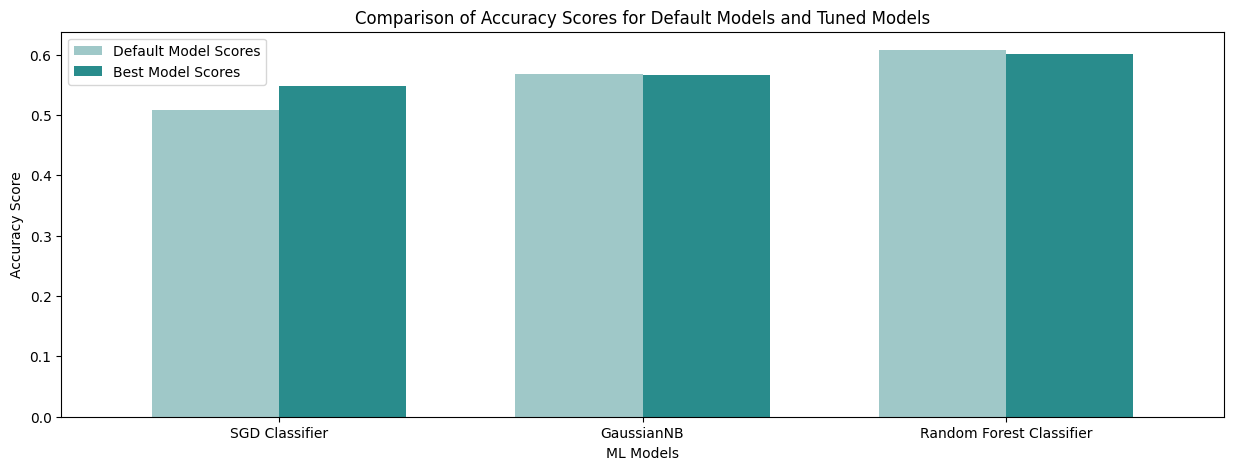

In [79]:
# Creating dataframes for the accuracy scores for default and tuned models
default_model_scores = pd.DataFrame([0.5084638242462689, 0.5678608393709725, 0.6077259523889019],
                                    index=['SGD Classifier', 'GaussianNB', 'Random Forest Classifier'],
                                    columns=['Accuracy Score (default model)'])

best_model_scores = pd.DataFrame([0.5478615071283096, 0.5659243430937198, 0.6014490334212547],
                                    index=['SGD Classifier', 'GaussianNB', 'Random Forest Classifier'],
                                    columns=['Accuracy Score (tuned model)'])

# Combined dataframe for the accuracy scores
scores_df = pd.concat([default_model_scores, best_model_scores], axis=1)
scores_df

# Plotting the bar plots for comparing the accuracy scores
scores_df.plot(kind="bar", figsize=(15, 5), width=0.7, color=['#9fc8c8', '#298c8c'])

# Labels and title
plt.xlabel("ML Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Accuracy Scores for Default Models and Tuned Models")
plt.legend(['Default Model Scores', 'Best Model Scores'])
plt.xticks(rotation=0)
plt.show()

Based on the model performances, we infer :
- The **default Random Forest Classifier** model gives the best accuracy score.
- The GaussianNB model does not show much effect on accuracy after hyper-parameter tuning.

# HistGradientBoosting Classifier

In [82]:
# from sklearn.ensemble import HistGradientBoostingClassifier

# hgb_clf = HistGradientBoostingClassifier(random_state=42)
# model1_hgb = hgb_clf.fit(X_train_transformed, y_train)

# y_pred_hgb = model1_hgb.predict(X_val_transformed)
# accuracy_score(y_val, y_pred_hgb)

0.6194117057861174

In [83]:
# param_dist_hgd = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
#     'max_iter': [100, 200, 500],  # Number of boosting iterations
#     'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
#     'min_samples_leaf': [10, 20, 50, 100],  # Minimum samples per leaf
#     'l2_regularization': [0, 0.1, 1, 10],  # L2 regularization for leaf values
#     'max_bins': [64, 128, 255],  # Number of bins for histograms
#     'loss': ['log_loss', 'auto'],  # Loss function
#     'scoring': ['accuracy', 'f1', 'roc_auc'],  # Evaluation metric
# }

# random_search_hgd = RandomizedSearchCV(hgb_clf, param_dist_hgd, n_iter=10, cv=5, scoring='accuracy', random_state=42)
# random_search_hgd.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingClassifier(random_state=42),
                   param_distributions={'l2_regularization': [0, 0.1, 1, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'loss': ['log_loss', 'auto'],
                                        'max_bins': [64, 128, 255],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_iter': [100, 200, 500],
                                        'min_samples_leaf': [10, 20, 50, 100],
                                        'scoring': ['accuracy', 'f1',
                                                    'roc_auc']},
                   random_state=42, scoring='accuracy')

In [86]:
from sklearn.ensemble import HistGradientBoostingClassifier

best_hgb_clf = HistGradientBoostingClassifier(random_state=42,
                                               scoring='roc_auc',
                                               min_samples_leaf=10,
                                               max_iter=500,
                                               max_depth=5,
                                               max_bins=128,
                                               loss='log_loss',
                                               learning_rate=0.1,
                                               l2_regularization=0.1)

best_model_hgb = best_hgb_clf.fit(X_train_transformed, y_train)
accuracy_score(y_val, best_model_hgb.predict(X_val_transformed))

0.6206804447263864

# Test Dataset and Submission File

In [80]:
# Reading the Test dataset
test_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

# DateOS and DateAS changes
DateOS_df_test = test_df['DateOS']
DateOS_df_test = pd.to_datetime(DateOS_df_test)
test_yearOS = DateOS_df_test.dt.year
test_monthOS = DateOS_df_test.dt.month
test_dayOS = DateOS_df_test.dt.day

DateAS_df_test = test_df['DateOS']
DateAS_df_test = pd.to_datetime(DateAS_df_test)
test_yearAS = DateAS_df_test.dt.year
test_monthAS = DateAS_df_test.dt.month
test_dayAS = DateAS_df_test.dt.day

# Changes in AppVersion
AppVersion_counts = test_df['AppVersion'].value_counts()
test_df['AppVersion'] = test_df['AppVersion'].apply(lambda x: 'Others' if AppVersion_counts[x] < 5000 else x)

# Changes in OSVerison
OSVersion_counts = test_df['OSVersion'].value_counts()
test_df['OSVersion'] = test_df['OSVersion'].apply(lambda x: 'Others' if OSVersion_counts[x] < 10 else x)

# Changes in PrimaryDiskType
test_df['PrimaryDiskType'] = test_df['PrimaryDiskType'].replace('Unspecified', 'UNKNOWN')

# Changes in chassis type
test_df['ChassisType'] = test_df['ChassisType'].replace([0, 30, 35], np.nan)
test_df['ChassisType'] = test_df['ChassisType'].replace('UNKNOWN', np.nan)
test_df['ChassisType'] = test_df['ChassisType'].replace('Unknown', np.nan)

# Implementing the grouping functions
test_df['EngVerNo'] = test_df['EngineVersion'].apply(VersionNo)    # Engine Version Groups
test_df['OSPltGrp'] = test_df['OsPlatformSubRelease'].apply(OSPlatformGroups)    # OS Platform Groups
test_df['OSLabNo']= test_df['OSBuildLab'].apply(LabNo)    # OS Build Lab Groups
test_df['OSBranchGrp'] = test_df['OSBranch'].apply(OSBranchGroups)    # OS Branch Groups
test_df['OSEdiNo'] = test_df['OSEdition'].apply(EditionNo)    # OS Edition Groups

# Adding test_yearOS, test_yearAS, test_monthOS, test_monthAS, test_dayOS, test_dayAS in the dataset
test_df['yearOS'] = test_yearOS
test_df['yearAS'] = test_yearAS
test_df['monthOS'] = test_monthOS
test_df['monthAS'] = test_monthAS
test_df['dayOS'] = test_dayOS
test_df['dayAS'] = test_dayAS

# Dropping the redundant features
new_test_df = test_df.drop(['IsFlightsDisabled','AutoSampleSubmissionEnabled','OSSkuFriendlyName',
                            'IsBetaUser','MachineID','DateAS','DateOS','EngineVersion','OsPlatformSubRelease',
                            'OSBuildLab','OSEdition','OSBranch'], axis=1)

# Frequency Encoding of the necessary features.
freq_enc_features = ['SignatureVersion','ChassisType','NumericOSVersion','monthOS','monthAS']
for i in freq_enc_features:
  new_test_df[i] = new_test_df[i].map(new_test_df[i].value_counts(normalize=True))

# Transforming the test set by implementing the pipeline
X_test_transformed = complete_pipe.transform(new_test_df)
X_test_transformed.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(10000, 104)

In [81]:
# Submission CSV generation
y_pred = best_model_hgb.predict(X_test_transformed)

submission = pd.DataFrame({'id': range(0, X_test_transformed.shape[0]),
                          'target': y_pred})

submission.to_csv('submission.csv', index=False)